In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [444]:
def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)]
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result

In [445]:
def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [446]:
# Parameters, add more if needed
sigma = 2
thresh = 0.01

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()

bw = plt.imread('Harris_1.jpg')  # Read in jpg image
bw = bw[:,:,0] * 0.299 + bw[:,:,1]*0.587 + bw[:,:,2] * 0.114 # Convert to grayscale

# computer x and y derivatives of image
Ix = conv2(bw, dx)
Iy = conv2(bw, dy)

In [447]:
# Creates a gaussian kernel
g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)

In [448]:
Iy2 = conv2(np.power(Iy, 2), g)
Ix2 = conv2(np.power(Ix, 2), g)
Ixy = conv2(Ix * Iy, g)

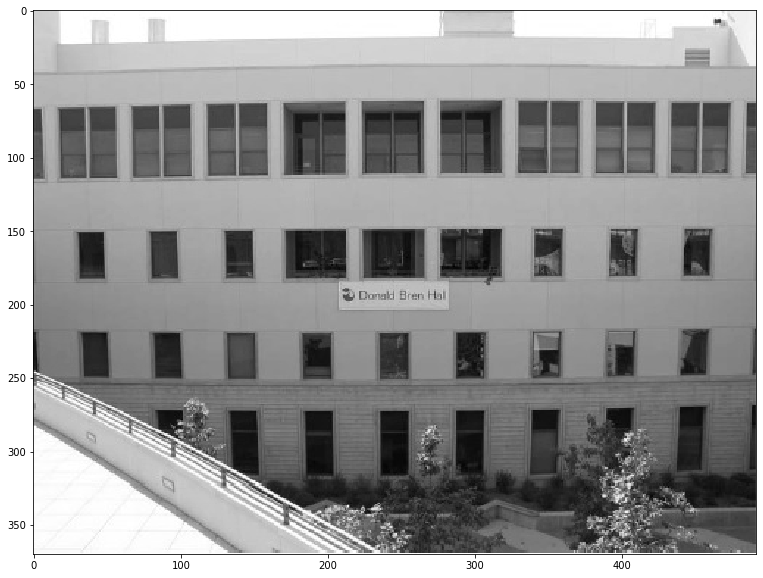

In [494]:
fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(bw, cmap='gray')

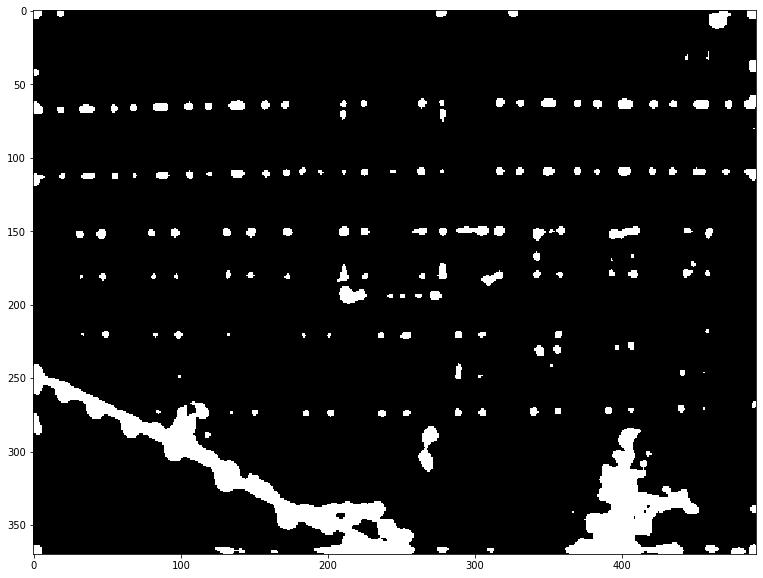

In [495]:
######################################################################
# Task: Compute the Harris Cornerness
######################################################################
def compute_cornerness(Ixy, Ix2, Iy2, k=thresh):
     
    detM = Ix2 * Iy2 - Ixy * Ixy
    trM = (Ix2 + Iy2) 
    R = detM - k * np.power(trM, 2)
    
    return R

R = compute_cornerness(Ixy=Ixy, Ix2=Ix2, Iy2=Iy2)

fig, ax = plt.subplots(figsize=(20,10))

ax.imshow(R > thresh * R.max(), cmap='gray')

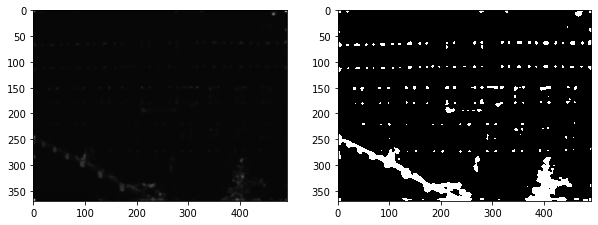

In [520]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(R, cmap='gray')
ax[1].imshow(R > 0.01 * R.max(), cmap='gray')
plt.show()

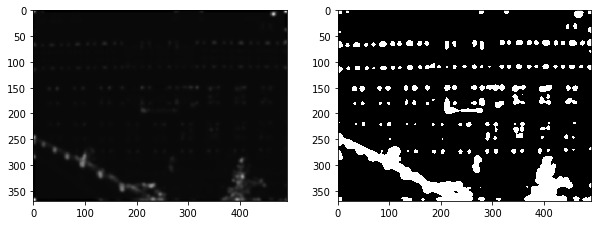

In [523]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(conv2(R, g), cmap='gray')
ax[1].imshow(conv2(R, g) > 0.0035 * R.max(), cmap='gray')
plt.show()
# plt.imshow(conv2(R, g))

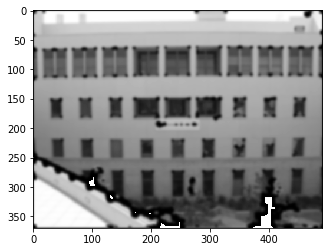

In [489]:
disp_im = bw * (R <= thresh * R.max())
disp_im = conv2(R, g)
disp_im[disp_im == 0] = 255
plt.imshow(disp_im, cmap='gray')

In [451]:
image = R * (R > thresh * R.max())

np.indices(image.shape)


array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [367, 367, 367, ..., 367, 367, 367],
        [368, 368, 368, ..., 368, 368, 368],
        [369, 369, 369, ..., 369, 369, 369]],

       [[  0,   1,   2, ..., 489, 490, 491],
        [  0,   1,   2, ..., 489, 490, 491],
        [  0,   1,   2, ..., 489, 490, 491],
        ...,
        [  0,   1,   2, ..., 489, 490, 491],
        [  0,   1,   2, ..., 489, 490, 491],
        [  0,   1,   2, ..., 489, 490, 491]]])

In [452]:
np.unique(R * (R > thresh * R.max()))

array([-0.00000000e+00,  4.31873962e+07,  4.31892698e+07, ...,
        3.64463481e+09,  3.74240281e+09,  4.31800799e+09])

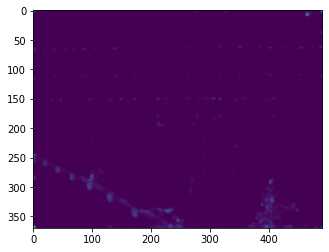

In [434]:
plt.imshow((R * (R > thresh * R.max())))

In [526]:
tile_height, tile_width = 74, 82
image_height, image_width = R.shape

m, n = image_height // tile_height, image_width // tile_width

X_coord = []
Y_coord = []

new_R = R * (R > thresh * R.max())

for i in range(n):
    for j in range(m):
        
        tile_of_interest = new_R[j * tile_height : (j+1) * tile_height, i * tile_width : (i+1) * tile_width]
        flat_tile = tile_of_interest.flatten()
        
        arr = flat_tile.argsort()[-10:] 
        
        for a in arr:
            
            if flat_tile[a] > 0:
                rel_x = a // tile_width
                rel_y = a % tile_width

                x = j * tile_height + rel_x
#                 print(a)
                y = i * tile_width + rel_y
#                 print(rel_x, rel_y)

                X_coord.append(x)
                Y_coord.append(y)
        
# len(np.vstack(results))
np.array(list(zip(X_coord, Y_coord))).shape

(300, 2)

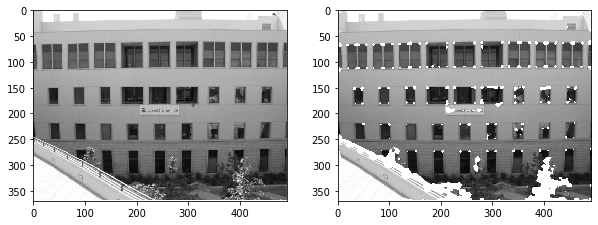

In [536]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

new_bw = bw.copy()
new_bw[X_coord, Y_coord] = 255

ax[0].imshow(bw, cmap='gray')
ax[1].imshow(new_bw, cmap='gray')
plt.show()

In [535]:
tile_height, tile_width = 74, 82
image_height, image_width = R.shape

m, n = image_height // tile_height, image_width // tile_width

X_coord = []
Y_coord = []

new_R = R * (R > thresh * R.max())

for i in range(n):
    for j in range(m):
        
        tile_of_interest = new_R[j * tile_height : (j+1) * tile_height, i * tile_width : (i+1) * tile_width]
        flat_tile = tile_of_interest.flatten()
        
        arr = flat_tile.argsort()[:] 
        
        for a in arr:
            
            if flat_tile[a] > 0:
                rel_x = a // tile_width
                rel_y = a % tile_width

                x = j * tile_height + rel_x
#                 print(a)
                y = i * tile_width + rel_y
#                 print(rel_x, rel_y)

                X_coord.append(x)
                Y_coord.append(y)
        
# len(np.vstack(results))
yas = np.array(list(zip(X_coord, Y_coord))).flatten()

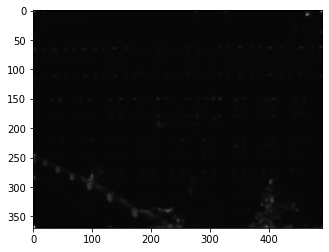

In [498]:
R
plt.imshow(R, cmap='gray')

In [517]:
matrix = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
matrix   

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

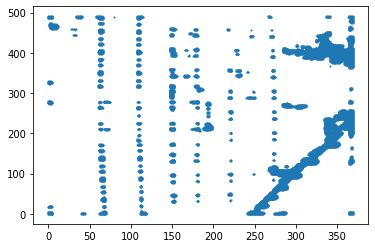

In [512]:
x, y = np.where(R > 0.01 * R.max())
plt.scatter(x, y, s=1)

In [510]:
x, y = np.where(R > 0.01 * R.max())

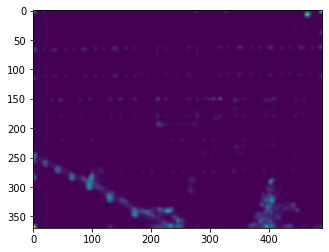

In [499]:
nms_image = conv2(R * (R > 0.001 * R.max()), g)
plt.imshow(nms_image)

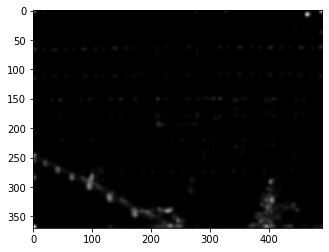

In [496]:
plt.imshow(conv2(R * (R > 0.001 * R.max()), g), cmap='gray')

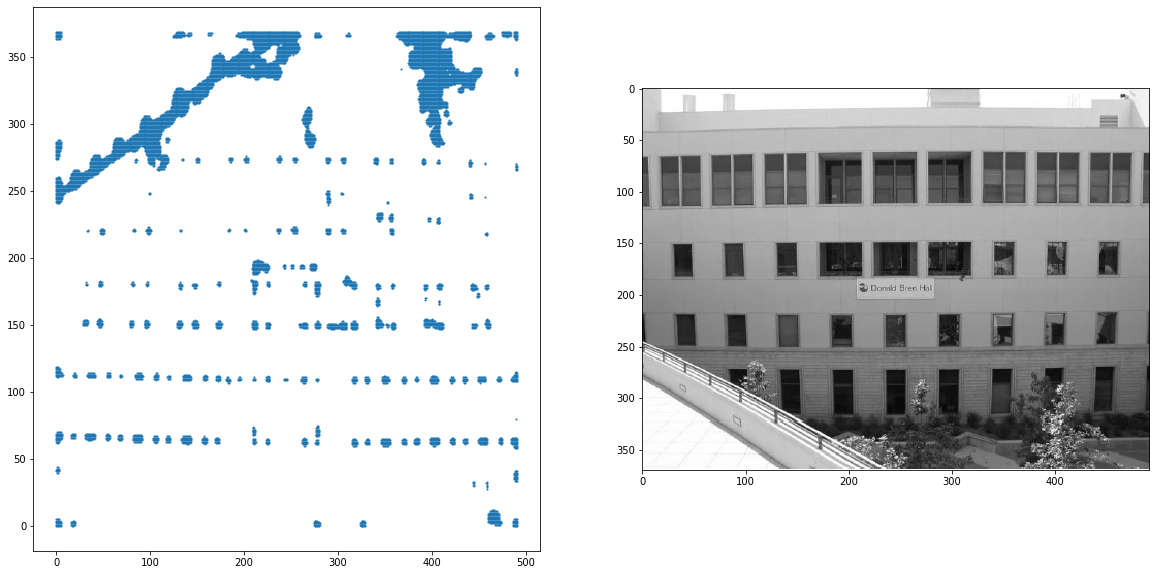

In [504]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.scatter(Y_coord, X_coord, s=1)
ax2.imshow(bw, cmap='gray')

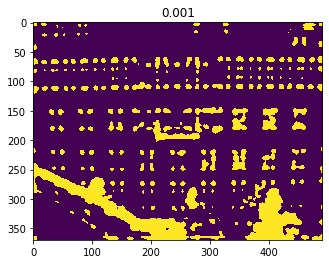

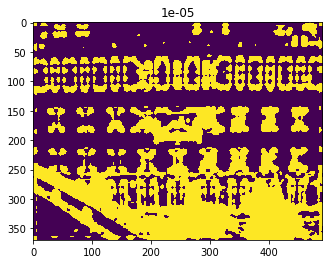

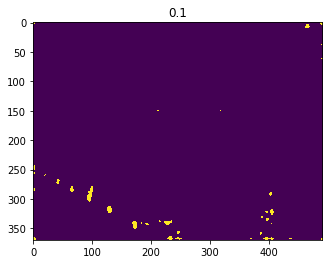

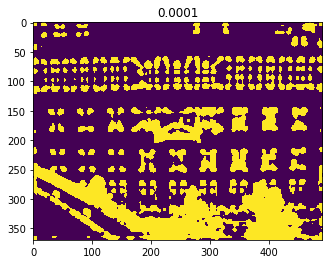

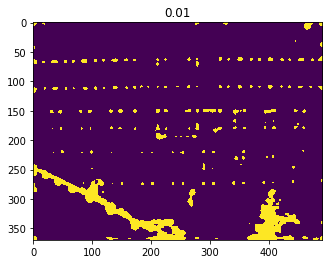

In [440]:
for thresh in ([0.001, 0.00001, 0.1, 0.0001, 0.01]):
    plt.imshow((R > thresh * R.max()))
    plt.title(thresh)
    plt.show()

In [189]:
threshold = 10
s = []
for ele in a:
    print(np.abs(a - ele + threshold))
    s.append(np.abs(a - ele))

[ 10  73  19  71 146  72  65  63  18  64]
[ 93  10  64  12 229  11 148 146  65 147]
[ 39  44  10  42 175  43  94  92  11  93]
[ 91   8  62  10 227   9 146 144  63 145]
[126 209 155 207  10 208  71  73 154  72]
[ 92   9  63  11 228  10 147 145  64 146]
[ 45 128  74 126  91 127  10   8  73   9]
[ 43 126  72 124  93 125  12  10  71  11]
[ 38  45   9  43 174  44  93  91  10  92]
[ 44 127  73 125  92 126  11   9  72  10]


In [198]:
np.array(s).min()

0

In [48]:
a = tile_of_interest.flatten()

a.argsort()[-1]

5984

In [44]:
a[5984]

709430055.9497079

In [45]:
idx = 5984

idx // tile_width, idx % tile_width

(72, 80)

In [46]:
tile_of_interest[72, 80]

709430055.9497079

In [47]:
R[(m-1)*tile_height+72,(n-1)*tile_width+ 80]

709430055.9497079

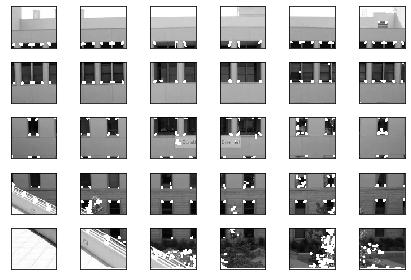

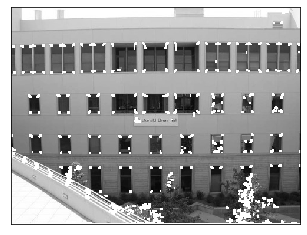

In [47]:
R.shape

h, w = 74, 82


fig, ax = plt.subplots(int(bw.shape[0]/h),int(bw.shape[1]/w))

for i in range(int(bw.shape[1]/w)):
    for j in range(int(bw.shape[0]/h)):
        ax[j,i].imshow(bw[j*h:(j+1)*h, i*w:(i+1)*w],cmap='gray')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
fig.tight_layout()
plt.show()

plt.imshow(bw, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
######################################################################
# Task: Perform non-maximum suppression and
#       thresholding, return the N corner points
#       as an Nx2 matrix of x and y coordinates
######################################################################


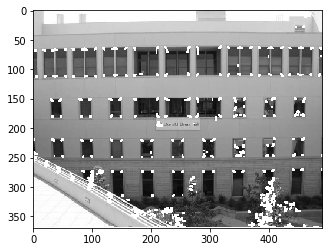

In [9]:
# Harris Corner Detection using inbuilt functions
import cv2
import numpy as np

filename = 'Harris_1.jpg'
img = cv2.imread(filename)
bw = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(bw)
dst = cv2.cornerHarris(gray,3,13,0.06)

# #result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
bw[dst>0.01*dst.max()]=255

plt.imshow(bw, cmap='gray')
plt.show()